## Building a breast cancer detection system

In this Notebook, you will build your own breat cancer detection system.

## Classification 

Classification has different algorithms, which we will study in detail but for a couple of videos, we will be diving into the one of the most powerful classification algorithms, **Logistic Regression**.

## Logistic Regression 

Logistic Regression is a classification algorithms, which will tell you the probability that an instance belong to this class or not with some threshold. If our probability is greater than 0.5 or 50 % then we will say this belongs to the class, means positive_label **1** ot if lesser we denote negative class or vice versa **0**.

#### Example 

- What is the probability that this image is cat image? 

If our probability is above 0.5 which is our threshold, then it is a cat image **1** otherwise it is non cat **0**.

#### Fact about Logistic Regression

It is called as regression because it's underlying technique is quite the same as Linear Regression. The term “Logistic” is taken from the Logit function that is used in this method of classification.

### Let's start diving in logistic regression 

### Hypothesis Function Or Prediction Function


It does the same work as linear regression does, logistic regression computes the features weights and the bias term and multiply with the respected features and sum them up.

$\hat{Y} = h(x) =  \Theta_0*x_{0} + \Theta_1*x_{1} + \Theta_2*x_{2} \ + \Theta_3*x_{3} + \Theta_n*x_{n}$

**Vectorized form of above equation** 

$\hat{Y} = h(x) = (x^T\Theta)$

But one thing more it does, it computes the sigmoid of the hypothesis, which will enable the hypothesis to give output between 0 and 1. 

$\hat{Y} = h(x) =  \sigma(x^T\Theta)$

Let's denote $x^T\Theta$ as z, so we can write our function:- 
$\sigma(z)$

$\sigma(z)$ is a sigmoid function which outputs the number between 0 and 1

**Sigmoid Function Can be Defined as:-**
$\sigma(z) = \frac{1}{1+exp(-z)}$ 

$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$ 


It forms S shaped figure.

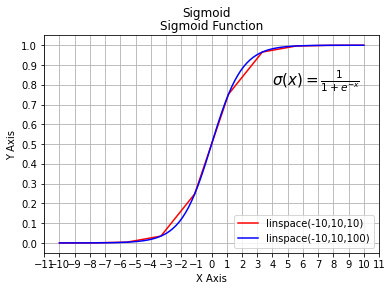

**We set the threshold** 
$\hat{Y}$ = 0 if prob < 0.5 else 1 if prob > 0.5

**Implementing sigmoid**

In [1]:
import numpy as np # for scientific computation 
import pandas as pd # for working with data
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.datasets import load_breast_cancer # dataset that we will be using 
import warnings # optional 
warnings.filterwarnings( "ignore" ) # optional 

In [2]:
def sigmoid(z): 
    '''
    input:  
        z : a scalar or an array 
    output: 
        h : sigmoid of z 
    '''
    h = 1 / (1 + np.exp(-z))
    
    return h

### Cost Function For Logistic Regression

The loss function for a single training example is
$$ J(\theta) = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)  $$ 

* when the model predicts 1 and the label $y$ is also 1, the loss for that training example is 0. 
* Similarly, when the model predicts 0 and the actual label is also 0, the loss for that training example is 0. 
* However, when the model prediction is close to 1and the label is 0, the second term of the log loss becomes a large.


***Cost Function for m training examples***

$$J(\theta) = -\frac{1}{m} ( \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) ) $$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of the i-th training example.
* $h(z(\theta)^{(i)})$ is the model's prediction for the i-th training example.

### Gradient Descent [ Optimization Objective ]

To update our weights $\Theta$ we apply our gradient descent, to improve our weights at every iteration. We take out the partial derviative of our cost function, or in other words, how much the cost function will change if we change $\Theta$ little bit. 

The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:


$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(x^{(i)}-y^{(i)})x_j $$

* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\theta_j$, so $x_j$ is the feature associated with weight $\theta_j$

* https://nipunbatra.github.io/ml2023/lectures/logistic-1.pdf

Here we are taking gradient step to reach to our global minimum, so that's why we are updating our previous theta parameter with the new one.


$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$


**Technical Note on $\alpha$ hyperparameter**


You have to tune the learning rate means you have to try different different rates and see your model how it performs. 

If you choose **very small learning rate**, it will be very very slow and it will never converge to the local minimum.  

If you choose **very large learning rate**, your model might diverge and never converge to the local minimum. 

### Guide on implementing vectorized Logistic Regression ####

**Hypothesis Function**

**z**= $ X . \Theta\$
<br>
And then you apply the sigmoid to each element in 'z': ℎ(𝑧)=𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑧)

- It has dimensions (m,1), where m is no. of training examples.   
<br>

**Vectorized Cost Function**
$$J(\Theta)= \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$


**Vectorized Gradient Descent** 
<br>
Above, we are taking out the gradient and updating  single weight $\theta_i$ at a time, but it will consume lot of time and space, instead of doing that, we can make a giant vector theta, which will contains all the feature weights, as given below:- 

$$\mathbf{\Theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$ 
<br> 
<br> 

* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1)  
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)


We have to update our theta values, so it is also vectorized:- 

$$\mathbf{\Theta} = \mathbf{\Theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

In [3]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        theta: your final weight vector
    '''
    m = len(y)
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z =  np.dot(x, theta) 
        
        # get the sigmoid of z
        h = sigmoid(z) 
        
        # calculate the cost function
        J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) 

        # update the weights theta
        theta =  theta -  alpha/m * (np.dot(x.T, (h-y))) 
        
    return theta 

### Loading the data and Training 

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import  train_test_split
data1 = pd.read_csv(r'C:\Users\HRUSHI\OneDrive - iitgn.ac.in\ML\Breast Cancer Detection System\breast-cancer.csv')
# data.head()
d1 = load_breast_cancer()
X = d1.data
y = d1.target
data = pd.DataFrame(X,columns=d1.feature_names)
data["ans"]=y
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,ans
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
#data = pd.DataFrame(data)
print(data.describe())
data.shape

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

(569, 31)

In [6]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
ans                        0
dtype: int64

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        theta: your final weight vector
    '''
    m = len(y)
    
    for i in range(num_iters):
        # get z, the dot product of x and theta
        # print("Iteration:", i+1)
        # print("Type of x:", type(x), x.shape)
        # print("Type of theta:", type(theta), theta.shape)
        # print("Values of x:", x)
        # print("Values of theta:", theta)
        z = np.dot(x, theta) 
        
        # get the sigmoid of z
        h = sigmoid(z) 
        
        # calculate the cost function
        J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
        
        # update the weights theta
        theta = theta - (alpha / m) * np.dot(x.T, (h - y))
        
    return theta 

# Assuming X has shape (m, n) and Y_train has shape (m,)
# Append a column of ones to X_train for the bias term
#data = np.c_[np.ones((data.shape[0], 1)), data]



In [8]:
#data.insert(0,'theta0',np.ones((data.shape[0], 1)) )
theta0_column = pd.DataFrame({'theta0': [1] * (data.shape[0])})

# Concatenate the original DataFrame with the new column
new_data = pd.concat([theta0_column, data], axis=1)

new_data.head()



,theta0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,ans
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
new_data.head()

,theta0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,ans
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:



# Initialize weights vector theta with size (n + 1,)

print(new_data.shape)
data = pd.DataFrame(new_data)
X = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]
theta = np.zeros(X.shape[1])
# #print(y)
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.3, random_state=0 )
### Now, we will train our model with gradient descent ### 
theta = gradientDescent(X_train, Y_train,theta, 0.001, 700)
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

(569, 32)
The resulting vector of weights is [0.03439443, 0.26607621, 0.42755222, 1.57201338, 0.96269165, 0.00251355, -0.00043216, -0.00378767, -0.00170031, 0.00471065, 0.00199218, 0.00015272, 0.0301271, -0.0101774, -0.79573317, 0.00017769, 2.66e-06, -0.00018819, 2.56e-05, 0.00048462, 6.265e-05, 0.27777251, 0.54217099, 1.58116185, -1.18056162, 0.00321099, -0.00248597, -0.00718289, -0.00170132, 0.00676345, 0.00202168]


You can see above, the you got the feature weights of all the features. Now using that you will make predictions. 

### Testing our model ### 

In [11]:
def predictions(xx, theta): 
    '''
    input: 
        X : input  
        theta : feature weights 
    output: 
        Y : 0 Or 1 
    '''
    Z = 1 / ( 1 + np.exp( - ( xx.dot( theta )) ) )        
    Y = np.where( Z > 0.5, 1, 0 )        
    return Y

y_pred = predictions(X_test, theta) ### Predicting on the test set 

In [12]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [13]:
accuracy = (y_pred==(Y_test)).sum()/len(X_test)
accuracy
'''
np.squeeze(Y_test): 
This part squeezes the true labels Y_test if there's any unnecessary dimension. It ensures that Y_test is a 1-dimensional array, which is required for comparison with y_pred.
'''

"\nnp.squeeze(Y_test): \nThis part squeezes the true labels Y_test if there's any unnecessary dimension. It ensures that Y_test is a 1-dimensional array, which is required for comparison with y_pred.\n"

In [14]:
def test_logistic_regression(test_x, test_y, theta):
    y_hat = [] # making an empty list 
    for x in range(test_x.shape[0]):
        #print(x)
        # get the label prediction 
        y_pred = predictions(test_x.iloc[x,:], theta) 
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    
    return accuracy

In [15]:
accuracy = test_logistic_regression(X_test, Y_test, theta)
print(f"Logistic regression model's accuracy = {accuracy:.4f}")

Logistic regression model's accuracy = 0.8830


## Testing other algorithms using SKlearn Models

### Before Hyper parameter tuning

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}



# Create an empty dictionary to store results for each model
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    # Store the results for the model
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

# Create DataFrame for results
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display results
print(results_df)



                     Accuracy  Precision    Recall
Logistic Regression  0.953216   0.990196  0.935185
Decision Tree        0.906433   0.969388  0.879630
Random Forest        0.964912   0.981132  0.962963
Gradient Boosting    0.982456   0.981651  0.990741
SVC                  0.923977   0.899160  0.990741
KNN                  0.947368   0.962617  0.953704
XGBoost              0.976608   0.981481  0.981481


### After Hyper parameter tuning

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

# Define hyperparameter grids for each classification model
models_grid = {
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "Decision Tree": {"max_depth": [None, 5, 10], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 5, 10], "min_samples_split": [2, 5, 10]},
    "Gradient Boosting": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5]},
    "SVC": {"kernel": ['rbf', 'sigmoid'], "C": [0.1, 1, 10], "gamma": ['scale', 'auto']},
    "KNN": {"n_neighbors": list(range(5, 11)), "weights": ['uniform', 'distance']},
    "XGBoost": {"n_estimators": [100, 200, 1000], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5]}
}


In [22]:


#final results stored here
best_results = {}

# Train and evaluate models with variations
for name, params_dict in models_grid.items():
    no_of_params = len(params_dict)
    # Get keys and values from param_grid_rf
    param_keys = list(params_dict.keys())
    param_values = list(params_dict.values())

    # Generate all combinations of hyperparameters
    import itertools
    param_combinations = list(itertools.product(*param_values))

    # Initialize best accuracy, precision, and recall for the model
    best_accuracy = 0.0
    best_precision = 0.0
    best_recall = 0.0

    # Initialize best hyperparameters for the model
    best_hyperparameters = None

    # Train and evaluate models with variations
    for params in param_combinations:
        # Set hyperparameters
        hyperparameters = {param_keys[i]: params[i] for i in range(len(param_keys))}
        models[name].set_params(**hyperparameters)
        # Train the model
        models[name].fit(X_train, Y_train)
        # Make predictions
        pred = models[name].predict(X_test)
        # Calculate evaluation metrics
        accuracy = accuracy_score(Y_test, pred)
        precision = precision_score(Y_test, pred)
        recall = recall_score(Y_test, pred)
        # Check if current metrics are better than the previous best
        if accuracy > best_accuracy:
            # Update best metrics and hyperparameters
            best_accuracy = accuracy
            best_precision = precision
            best_recall = recall
            best_hyperparameters = hyperparameters

    # Store the best results for the model
    best_results[name] = {'Model': name, 
                          'Hyperparameters': best_hyperparameters, 
                          'Accuracy': best_accuracy,
                          'Precision': best_precision,
                          'Recall': best_recall}

# Create DataFrame from the best results dictionary
best_results_df = pd.DataFrame(list(best_results.values()))

# Display
display(best_results_df)


,Model,Hyperparameters,Accuracy,Precision,Recall
0,Logistic Regression,{'C': 0.1},0.953216,0.971698,0.953704
1,Decision Tree,"{'max_depth': 5, 'min_samples_split': 10}",0.941520,0.971154,0.935185
2,Random Forest,"{'n_estimators': 100, 'max_depth': None, 'min_...",0.982456,0.990654,0.981481
3,Gradient Boosting,"{'n_estimators': 200, 'learning_rate': 0.1, 'm...",0.988304,0.981818,1.000000
4,SVC,"{'kernel': 'rbf', 'C': 10, 'gamma': 'scale'}",0.953216,0.946429,0.981481
5,KNN,"{'n_neighbors': 9, 'weights': 'uniform'}",0.959064,0.963303,0.972222
6,XGBoost,"{'n_estimators': 200, 'learning_rate': 0.1, 'm...",0.982456,0.981651,0.990741


### Extra Testing and Rough

In [99]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

def loss(y_true, y_pred, retur=False): 
    pre = precision_score(y_true, y_pred, average='macro')  
    rec = recall_score(y_true, y_pred, average='macro') 
    accuracy = accuracy_score(y_true, y_pred)
    
    if retur:
        return pre, rec, accuracy 
    else: 
        print(pre) 
        print(rec) 
        print(accuracy)
def train_and_eval(models, X_train, X_test, Y_train, Y_test ): 
    for name, model in models.items(): 
        print(name ,':')  
        model.fit(X_train, Y_train )
        loss(Y_test, model.predict(X_test)) 
        print('*' * 30) 


In [102]:

accuracy = test_logistic_regression(X_test, Y_test, theta)
print(f"Logistic regression model's accuracy = {accuracy:.4f}")
train_and_eval(models, X_train, X_test, Y_train, Y_test )
#X_train, X_test, Y_train, Y_test

Logistic regression model's accuracy = 0.8830
Logistic_Regression :
0.9443734015345269
0.9596560846560847
0.9532163742690059
******************************
SVC :
0.3157894736842105
0.5
0.631578947368421
******************************
DecisionTreeClassifier :
0.8985109717868338
0.8736772486772486
0.8947368421052632
******************************
GradientBoostingClassifier :
0.9225689404934688
0.9279100529100529
0.9298245614035088
******************************


### Reference
Youtube:-  https://www.youtube.com/c/neweraa 

Thanks 